In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('Greenhouse Plant Growth Metrics.csv')

In [3]:
df.head()

,Random,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG,Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398288,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Random  30000 non-null  object 
 1   ACHP    30000 non-null  float64
 2   PHR     30000 non-null  float64
 3   AWWGV   30000 non-null  float64
 4   ALAP    30000 non-null  float64
 5   ANPL    30000 non-null  float64
 6   ARD     30000 non-null  float64
 7   ADWR    30000 non-null  float64
 8   PDMVG   30000 non-null  float64
 9   ARL     30000 non-null  float64
 10  AWWR    30000 non-null  float64
 11  ADWV    30000 non-null  float64
 12  PDMRG   30000 non-null  float64
 13  Class   30000 non-null  object 
dtypes: float64(12), object(2)
memory usage: 3.2+ MB


,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,38.060575,59.020331,1.247257,1063.639833,3.944789,16.285792,1.000981,22.674553,18.071061,2.907011,0.292094,34.922184
std,4.441682,11.985213,0.245989,260.712823,0.702537,2.882793,0.456292,9.571091,2.932830,1.361928,0.151516,7.998132
min,32.664004,37.020398,0.848351,658.488225,2.959173,11.075737,0.241972,8.021505,12.359924,1.126715,0.038210,23.632527
25%,34.399604,51.059436,1.064865,875.501356,3.013099,13.933350,0.675892,14.980983,15.600294,1.911408,0.185512,28.650713
50%,36.575753,55.912058,1.211328,1009.249080,3.998577,16.248496,0.833799,21.954006,18.477019,2.818611,0.246454,33.372665
75%,42.300836,67.069465,1.501692,1243.866525,4.015829,18.202577,1.313504,27.711471,20.365252,3.254133,0.407858,39.137224
max,46.431668,77.040610,1.775383,1751.031654,5.037358,23.325870,2.196556,43.660373,23.253049,6.908923,0.687470,57.672004


In [5]:
df.isnull().sum()

Random    0
ACHP      0
PHR       0
AWWGV     0
ALAP      0
ANPL      0
ARD       0
ADWR      0
PDMVG     0
ARL       0
AWWR      0
ADWV      0
PDMRG     0
Class     0
dtype: int64

In [6]:
df.duplicated().sum()  # Count duplicate rows
df = df.drop_duplicates()  # Remove duplicates if any

In [7]:
df.columns

Index(['Random', 'ACHP', 'PHR', 'AWWGV', 'ALAP', 'ANPL', 'ARD', 'ADWR',
       'PDMVG', 'ARL', 'AWWR', 'ADWV', 'PDMRG', 'Class'],
      dtype='object')

In [9]:
df.rename(columns={
    'ACHP': 'avg_chlorophyll_content',
    'PHR': 'plant_height_rating',
    'AWWGV': 'avg_wet_weight_green_vegetative',
    'ALAP': 'avg_leaf_area_per_plant',
    'ANPL': 'avg_number_of_leaves_per_plant',
    'ARD': 'avg_root_diameter',
    'ADWR': 'avg_dry_root_weight',
    'PDMVG': 'plant_dry_matter_in_vegetative_growth',
    'ARL': 'avg_root_length',
    'AWWR': 'avg_wet_weight_root',
    'ADWV': 'avg_dry_weight_veg_parts',
    'PDMRG': 'percentage_dry_matter_in_root_growth',
    'Class': 'class_label',
    'Random': 'random_plant_sample'
}, inplace=True)


In [10]:
df.columns

Index(['random_plant_sample', 'avg_chlorophyll_content', 'plant_height_rating',
       'avg_wet_weight_green_vegetative', 'avg_leaf_area_per_plant',
       'avg_number_of_leaves_per_plant', 'avg_root_diameter',
       'avg_dry_root_weight', 'plant_dry_matter_in_vegetative_growth',
       'avg_root_length', 'avg_wet_weight_root', 'avg_dry_weight_veg_parts',
       'percentage_dry_matter_in_root_growth', 'class_label'],
      dtype='object')

In [11]:
df.isnull().sum()

random_plant_sample                      0
avg_chlorophyll_content                  0
plant_height_rating                      0
avg_wet_weight_green_vegetative          0
avg_leaf_area_per_plant                  0
avg_number_of_leaves_per_plant           0
avg_root_diameter                        0
avg_dry_root_weight                      0
plant_dry_matter_in_vegetative_growth    0
avg_root_length                          0
avg_wet_weight_root                      0
avg_dry_weight_veg_parts                 0
percentage_dry_matter_in_root_growth     0
class_label                              0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class_label'] = le.fit_transform(df['class_label'])
df['random_plant_sample'] = le.fit_transform(df['random_plant_sample'])

In [13]:
df.dtypes

random_plant_sample                        int64
avg_chlorophyll_content                  float64
plant_height_rating                      float64
avg_wet_weight_green_vegetative          float64
avg_leaf_area_per_plant                  float64
avg_number_of_leaves_per_plant           float64
avg_root_diameter                        float64
avg_dry_root_weight                      float64
plant_dry_matter_in_vegetative_growth    float64
avg_root_length                          float64
avg_wet_weight_root                      float64
avg_dry_weight_veg_parts                 float64
percentage_dry_matter_in_root_growth     float64
class_label                                int64
dtype: object

In [14]:
df.head()

,random_plant_sample,avg_chlorophyll_content,plant_height_rating,avg_wet_weight_green_vegetative,avg_leaf_area_per_plant,avg_number_of_leaves_per_plant,avg_root_diameter,avg_dry_root_weight,plant_dry_matter_in_vegetative_growth,avg_root_length,avg_wet_weight_root,avg_dry_weight_veg_parts,percentage_dry_matter_in_root_growth,class_label
0,0,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,0
1,0,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398288,19.758836,2.943137,0.216154,57.633697,0
2,1,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,0
3,0,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,0
4,2,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,0


In [15]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
LL=q1-(1.5*IQR)
UL=q3+(1.5*IQR)
df1=df[(df>=LL) & (df<=UL)]

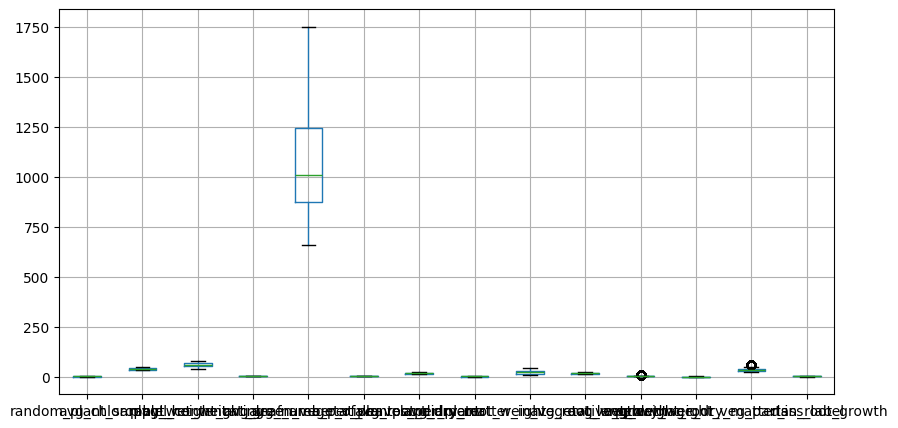

In [16]:
df.boxplot(figsize=(10,5),fontsize=10)
plt.show()

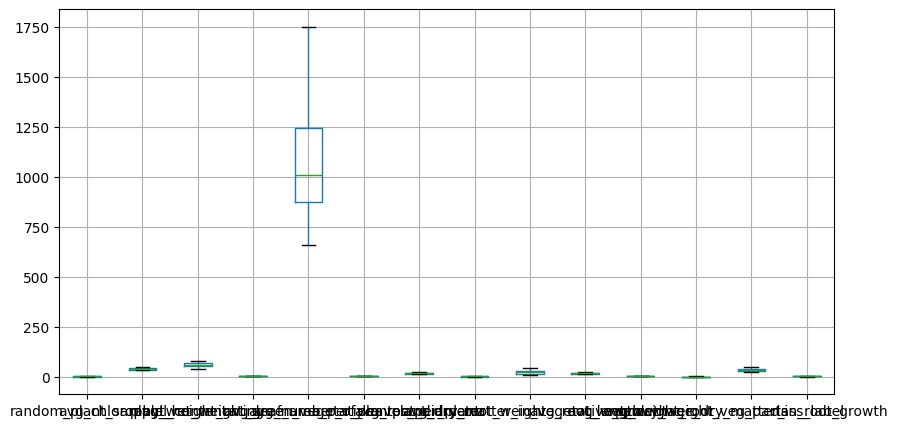

In [17]:
df1.boxplot(figsize=(10,5),fontsize=10)
plt.show()

In [ ]:
df1.isnull().sum()

random_plant_sample                         0
avg_chlorophyll_content                     0
plant_height_rating                         0
avg_wet_weight_green_vegetative             0
avg_leaf_area_per_plant                     0
avg_number_of_leaves_per_plant              0
avg_root_diameter                           0
avg_dry_root_weight                         0
plant_dry_matter_in_vegetative_growth       0
avg_root_length                             0
avg_wet_weight_root                      1627
avg_dry_weight_veg_parts                    0
percentage_dry_matter_in_root_growth     1646
class_label                                 0
dtype: int64

In [ ]:
df1['avg_wet_weight_root'].value_counts

<bound method IndexOpsMixin.value_counts of 0        2.949240
1        2.943137
2        2.861635
3        2.946784
4        2.766242
           ...   
29995    3.264946
29996    3.259574
29997    3.495121
29998    3.141850
29999    3.270421
Name: avg_wet_weight_root, Length: 30000, dtype: float64>

In [20]:
df1['avg_wet_weight_root'].median

<bound method Series.median of 0        2.949240
1        2.943137
2        2.861635
3        2.946784
4        2.766242
           ...   
29995    3.264946
29996    3.259574
29997    3.495121
29998    3.141850
29999    3.270421
Name: avg_wet_weight_root, Length: 30000, dtype: float64>

In [21]:
df1['avg_wet_weight_root'].fillna(df['avg_wet_weight_root'].median(),inplace=True)

In [22]:
df1['percentage_dry_matter_in_root_growth'].median

<bound method Series.median of 0              NaN
1              NaN
2        41.289875
3              NaN
4        27.898619
           ...    
29995    33.343799
29996    33.338906
29997    26.041147
29998    39.125346
29999    33.353872
Name: percentage_dry_matter_in_root_growth, Length: 30000, dtype: float64>

In [23]:
df1['percentage_dry_matter_in_root_growth'].value_counts

<bound method IndexOpsMixin.value_counts of 0              NaN
1              NaN
2        41.289875
3              NaN
4        27.898619
           ...    
29995    33.343799
29996    33.338906
29997    26.041147
29998    39.125346
29999    33.353872
Name: percentage_dry_matter_in_root_growth, Length: 30000, dtype: float64>

In [24]:
df1['percentage_dry_matter_in_root_growth'].fillna(df['percentage_dry_matter_in_root_growth'].median(),inplace=True)

In [25]:
df1.isnull().sum()

random_plant_sample                      0
avg_chlorophyll_content                  0
plant_height_rating                      0
avg_wet_weight_green_vegetative          0
avg_leaf_area_per_plant                  0
avg_number_of_leaves_per_plant           0
avg_root_diameter                        0
avg_dry_root_weight                      0
plant_dry_matter_in_vegetative_growth    0
avg_root_length                          0
avg_wet_weight_root                      0
avg_dry_weight_veg_parts                 0
percentage_dry_matter_in_root_growth     0
class_label                              0
dtype: int64

In [26]:
q1=df1.quantile(0.25)
q3=df1.quantile(0.75)
IQR=q3-q1
LL=q1-(1.5*IQR)
UL=q3+(1.5*IQR)
df2=df1[(df1>=LL)&(df1<=UL)]

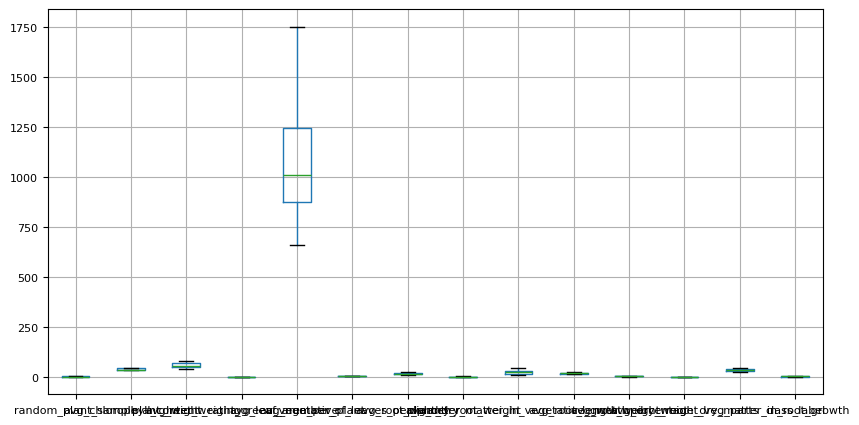

In [27]:
df2.boxplot(figsize=(10,5),fontsize=8)
plt.show()

In [28]:
df2.isnull().sum()

random_plant_sample                      0
avg_chlorophyll_content                  0
plant_height_rating                      0
avg_wet_weight_green_vegetative          0
avg_leaf_area_per_plant                  0
avg_number_of_leaves_per_plant           0
avg_root_diameter                        0
avg_dry_root_weight                      0
plant_dry_matter_in_vegetative_growth    0
avg_root_length                          0
avg_wet_weight_root                      0
avg_dry_weight_veg_parts                 0
percentage_dry_matter_in_root_growth     0
class_label                              0
dtype: int64

In [29]:
df2.to_csv("cleaned_greenhouse_dataset.csv", index=False)

In [30]:
import seaborn as sns

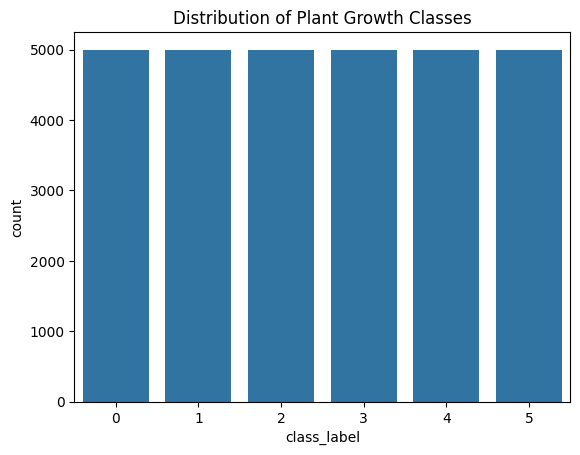

In [35]:
#CLASS DISTRIBUTION
sns.countplot(data=df2,x='class_label')
plt.title('Distribution of Plant Growth Classes')
plt.show()

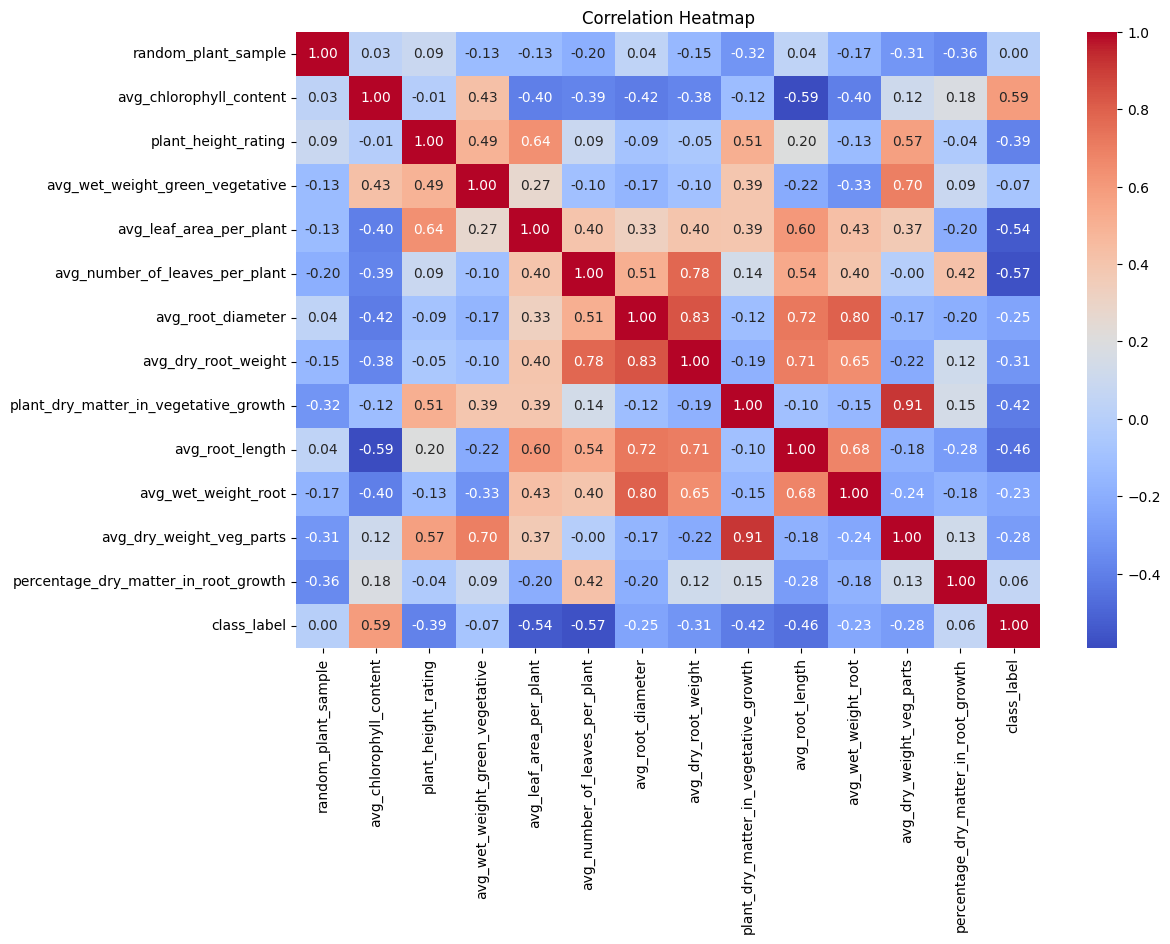

In [36]:
#CORRELATION HEATMAP
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
df2.columns

Index(['random_plant_sample', 'avg_chlorophyll_content', 'plant_height_rating',
       'avg_wet_weight_green_vegetative', 'avg_leaf_area_per_plant',
       'avg_number_of_leaves_per_plant', 'avg_root_diameter',
       'avg_dry_root_weight', 'plant_dry_matter_in_vegetative_growth',
       'avg_root_length', 'avg_wet_weight_root', 'avg_dry_weight_veg_parts',
       'percentage_dry_matter_in_root_growth', 'class_label'],
      dtype='object')

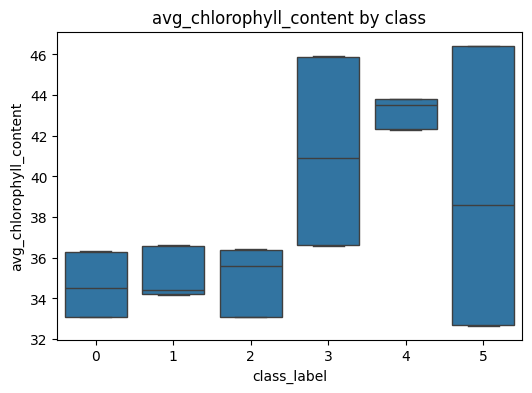

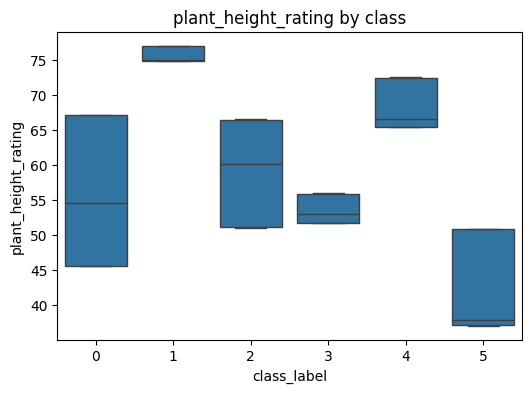

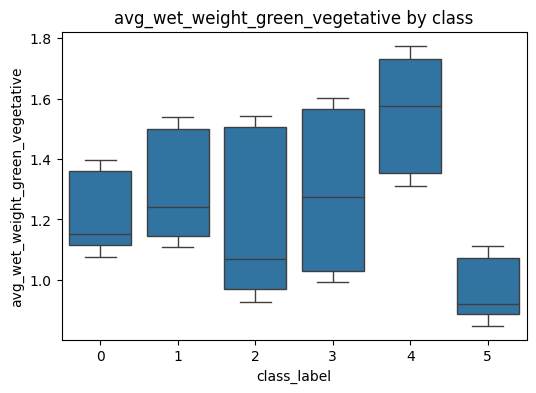

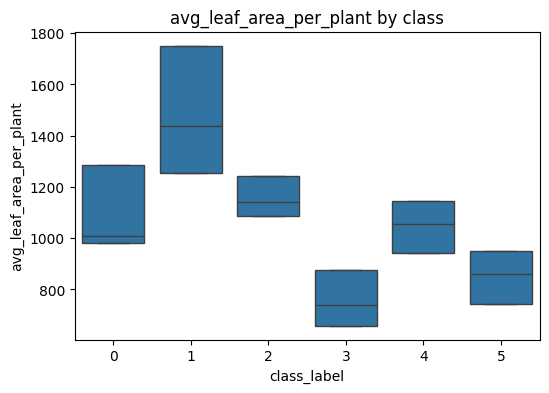

In [38]:
features = ['avg_chlorophyll_content','plant_height_rating', 'avg_wet_weight_green_vegetative','avg_leaf_area_per_plant']
for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='class_label',y=col,data=df2)
    plt.title(f"{col} by class")
    plt.show()
            

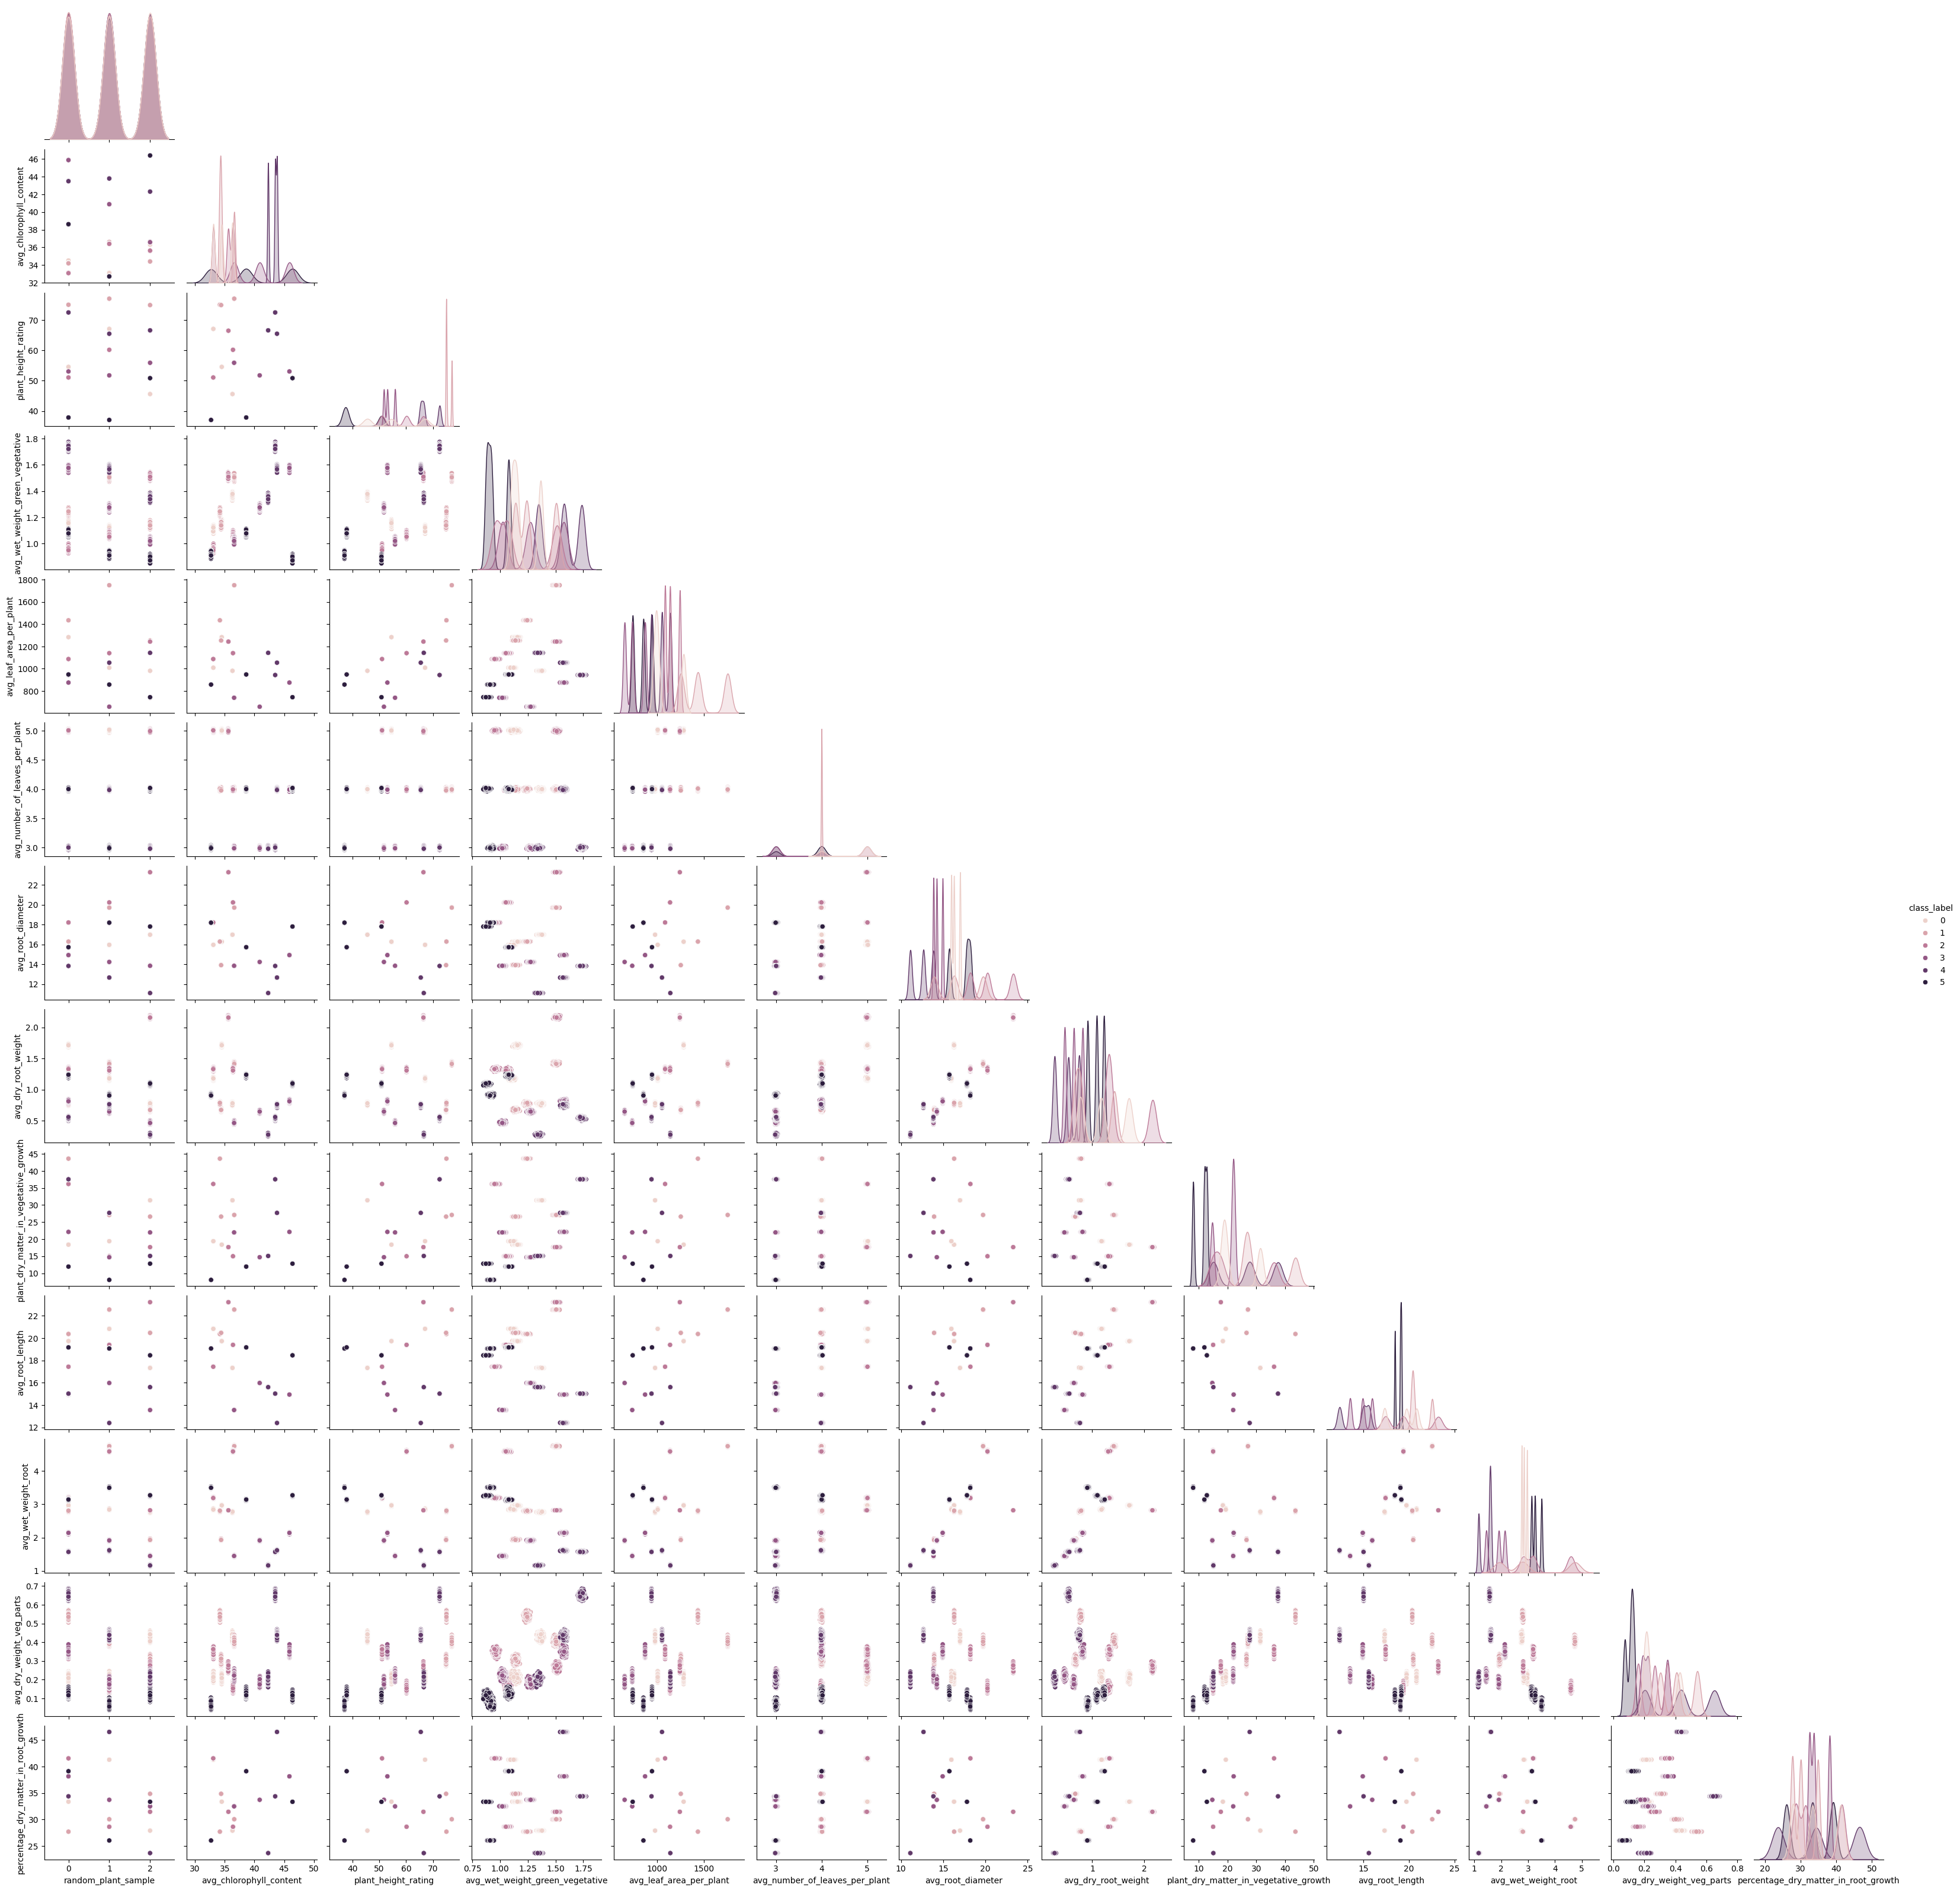

In [39]:
#PAIRWISE RELATIONSHIP BETWEEN FEATURES
sns.pairplot(df2, hue='class_label', corner=True)
plt.show()

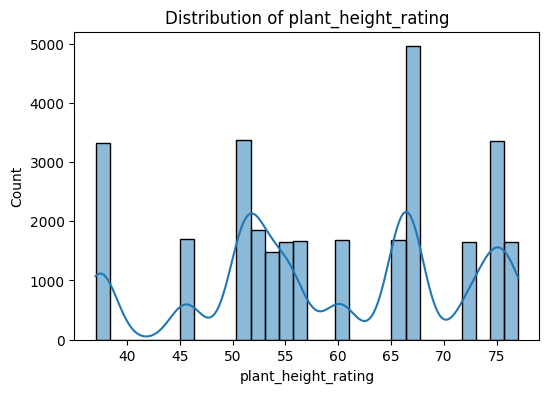

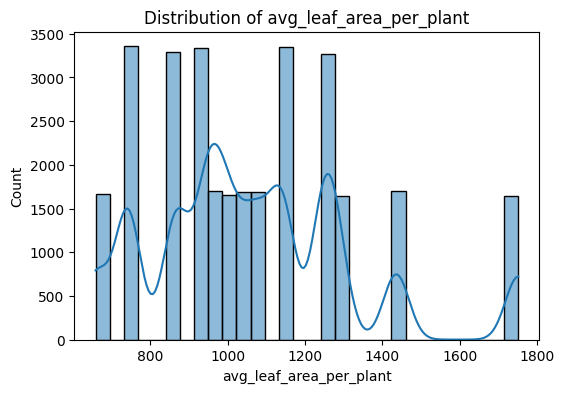

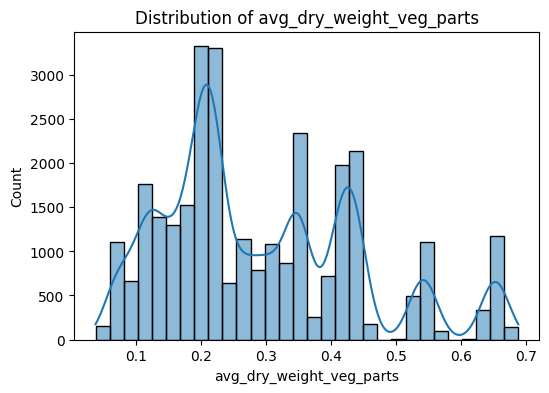

In [40]:
#Distribution plots of key features
for col in ['plant_height_rating','avg_leaf_area_per_plant','avg_dry_weight_veg_parts']:
    plt.figure(figsize=(6,4))
    sns.histplot(df2[col],kde=True,bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

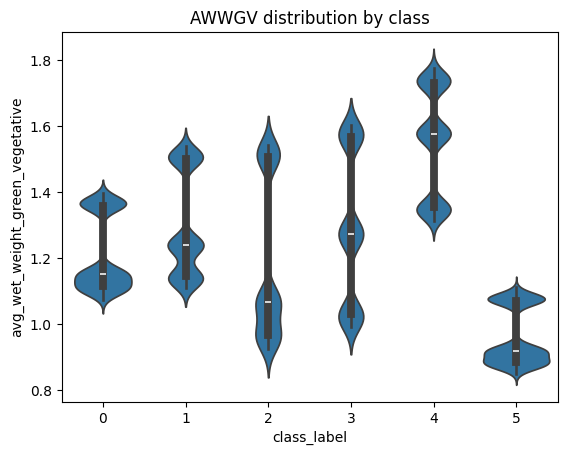

In [41]:
#VIOLIN PLOT (FEATURE DENSITY vs CLASS_LABEL)
sns.violinplot(data=df2,x='class_label',y='avg_wet_weight_green_vegetative')
plt.title("AWWGV distribution by class")
plt.show()

In [35]:
df.columns

Index(['random_plant_sample', 'avg_chlorophyll_content', 'plant_height_rating',
       'avg_wet_weight_green_vegetative', 'avg_leaf_area_per_plant',
       'avg_number_of_leaves_per_plant', 'avg_root_diameter',
       'avg_dry_root_weight', 'plant_dry_matter_in_vegetative_growth',
       'avg_root_length', 'avg_wet_weight_root', 'avg_dry_weight_veg_parts',
       'percentage_dry_matter_in_root_growth', 'class_label'],
      dtype='object')

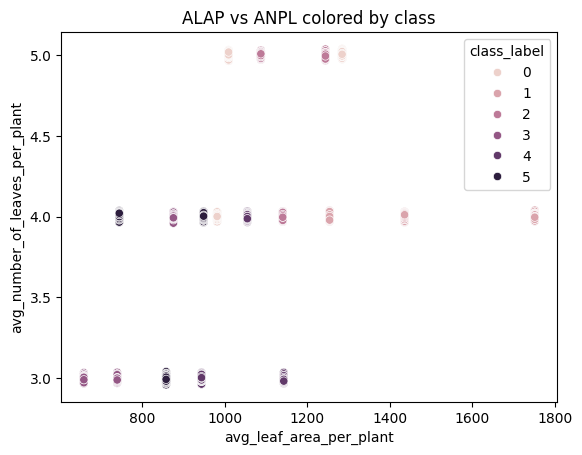

In [42]:
#SCATTER PLOT FOR RELATIONSHIPS
sns.scatterplot(data=df2,x='avg_leaf_area_per_plant',y='avg_number_of_leaves_per_plant',hue='class_label')
plt.title("ALAP vs ANPL colored by class")
plt.show()

In [43]:
df2.head()

,random_plant_sample,avg_chlorophyll_content,plant_height_rating,avg_wet_weight_green_vegetative,avg_leaf_area_per_plant,avg_number_of_leaves_per_plant,avg_root_diameter,avg_dry_root_weight,plant_dry_matter_in_vegetative_growth,avg_root_length,avg_wet_weight_root,avg_dry_weight_veg_parts,percentage_dry_matter_in_root_growth,class_label
0,0,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,33.372665,0
1,0,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398288,19.758836,2.943137,0.216154,33.372665,0
2,1,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,0
3,0,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,33.372665,0
4,2,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,0


In [44]:
df2.isnull().sum()

random_plant_sample                      0
avg_chlorophyll_content                  0
plant_height_rating                      0
avg_wet_weight_green_vegetative          0
avg_leaf_area_per_plant                  0
avg_number_of_leaves_per_plant           0
avg_root_diameter                        0
avg_dry_root_weight                      0
plant_dry_matter_in_vegetative_growth    0
avg_root_length                          0
avg_wet_weight_root                      0
avg_dry_weight_veg_parts                 0
percentage_dry_matter_in_root_growth     0
class_label                              0
dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [46]:
df2.columns

Index(['random_plant_sample', 'avg_chlorophyll_content', 'plant_height_rating',
       'avg_wet_weight_green_vegetative', 'avg_leaf_area_per_plant',
       'avg_number_of_leaves_per_plant', 'avg_root_diameter',
       'avg_dry_root_weight', 'plant_dry_matter_in_vegetative_growth',
       'avg_root_length', 'avg_wet_weight_root', 'avg_dry_weight_veg_parts',
       'percentage_dry_matter_in_root_growth', 'class_label'],
      dtype='object')

In [47]:
#REGRESSION TASK
x_reg = df2.drop(columns=['avg_leaf_area_per_plant','class_label','random_plant_sample'])
y_reg = df2['avg_leaf_area_per_plant']

In [48]:
x_train_reg,x_test_reg,y_train_reg,y_test_reg = train_test_split(x_reg,y_reg,test_size=0.2,random_state=42)


In [49]:
scaler_reg = StandardScaler()
x_train_reg = scaler_reg.fit_transform(x_train_reg)
x_test_reg = scaler_reg.fit_transform(x_test_reg)

In [50]:
lin_model = LinearRegression()
lin_model.fit(x_train_reg,y_train_reg)
y_pred_reg = lin_model.predict(x_test_reg)

In [52]:
print("LINEAR REGRESSION RESULT")
print("MSE:",mean_squared_error(y_test_reg,y_pred_reg))
print("r2_score:",r2_score(y_test_reg,y_pred_reg))

LINEAR REGRESSION RESULT
MSE: 6414.418575520531
r2_score: 0.9042554268084096


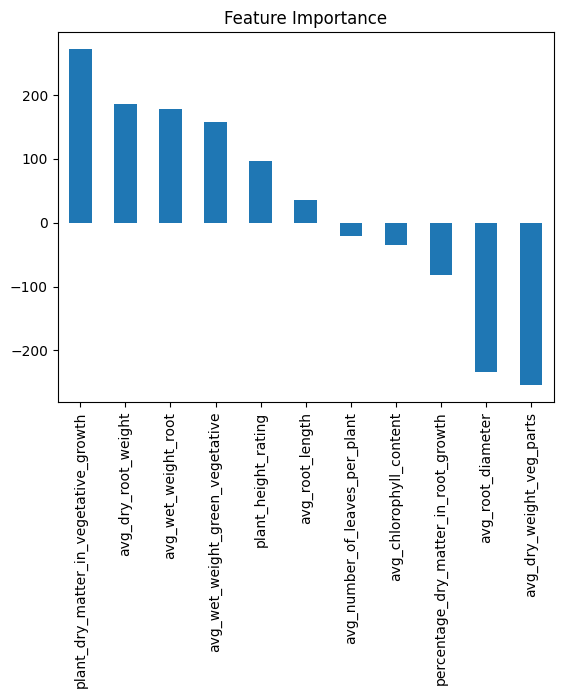

In [53]:
#FEATURE IMPORTANCE
importance_reg = pd.Series(lin_model.coef_,index=x_reg.columns)
importance_reg.sort_values(ascending=False).plot(kind='bar',title='Feature Importance')
plt.show()

In [54]:
df2.columns

Index(['random_plant_sample', 'avg_chlorophyll_content', 'plant_height_rating',
       'avg_wet_weight_green_vegetative', 'avg_leaf_area_per_plant',
       'avg_number_of_leaves_per_plant', 'avg_root_diameter',
       'avg_dry_root_weight', 'plant_dry_matter_in_vegetative_growth',
       'avg_root_length', 'avg_wet_weight_root', 'avg_dry_weight_veg_parts',
       'percentage_dry_matter_in_root_growth', 'class_label'],
      dtype='object')

In [55]:
#CLASSIFICATION TASK
x_clf = df2.drop(columns=['class_label','random_plant_sample'])
y_clf =df2['class_label']

In [56]:
x_train_clf,x_test_clf,y_train_clf,y_test_clf = train_test_split(x_clf,y_clf,test_size=0.2,random_state=42)
                                                                 

In [57]:
scaler_clf = StandardScaler()
x_train_clf =scaler_clf.fit_transform(x_train_clf)
x_test_clf =scaler_clf.transform(x_test_clf)

In [58]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train_clf,y_train_clf)
y_pred_clf =log_model.predict(x_test_clf)

In [59]:
print("Logistic Regression Results")
print("Accuracy:",accuracy_score(y_test_clf,y_pred_clf))
print("\n classification Report: \n", classification_report(y_test_clf,y_pred_clf))


Logistic Regression Results
Accuracy: 1.0

 classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00      1024
           2       1.00      1.00      1.00      1046
           3       1.00      1.00      1.00       950
           4       1.00      1.00      1.00      1033
           5       1.00      1.00      1.00       969

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



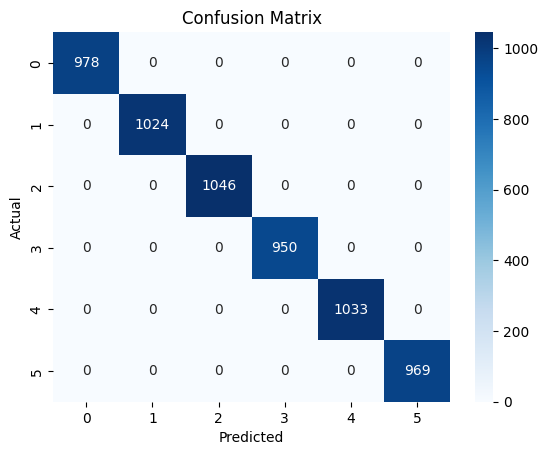

In [60]:
cm =confusion_matrix(y_test_clf,y_pred_clf)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

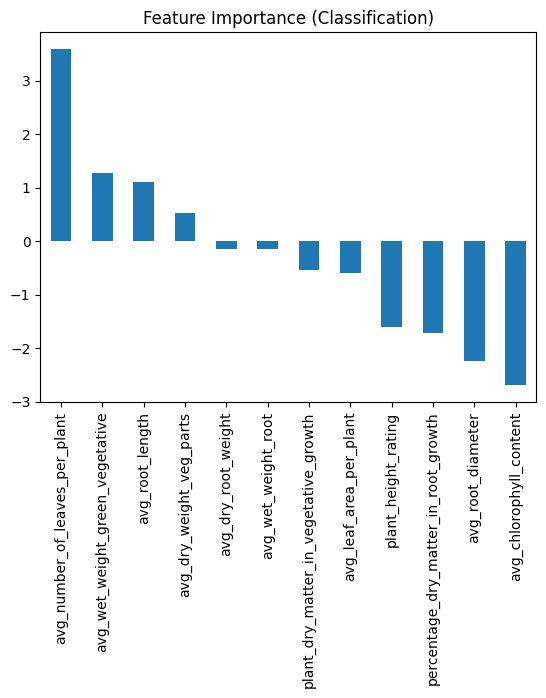

In [63]:
#FEATURE IMPORTANCE (CLASSIFICATION)
importance_clf = pd.Series(log_model.coef_[0],index=x_clf.columns)
importance_clf.sort_values(ascending=False).plot(kind='bar',title='Feature Importance (Classification)')
plt.show()

In [64]:
df2.to_csv("regression_with_prediction.csv",index=False)

In [65]:
pip install pymysql sqlalchemy


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd

username = "root"
password = "srilakshmi1006"
host = "localhost"
database = "greenhouse_db"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")
df.to_sql('greenhouse', con=engine, if_exists='replace', index=False)
print("Data saved to MySQL database")

Data saved to MySQL database


In [67]:
label_mapping = {
    0: 'Traditional - A',
    1: 'Traditional - B',
    2: 'Traditional - C',
    3: 'IoT-Based - A',
    4: 'IoT-Based - B',
    5: 'IoT-Based - C'
}

df2['class_readable'] = df2['class_label'].map(label_mapping)


In [68]:

df2.to_sql("greenhouse", con=engine, index=False, if_exists="replace")


30000

In [69]:
df2.to_csv("regression_with_readable.csv", index=False)